# Tarefa 06

In [10]:
from PIL import Image as img
import matplotlib.pyplot as plt
import numpy as np
import math

In [11]:
def plot(img1, img2):
    fig = plt.figure(figsize=(100,100))
    a=fig.add_subplot(1,3,1)
    imgplot = plt.imshow(img1)
    a.set_title('Imagem 1')

    a=fig.add_subplot(1,3,2)
    imgplot = plt.imshow(img2)
    imgplot.set_clim(0.0,0.7)
    a.set_title('Imagem 2')    

In [12]:
corredor = img.open("corredor_escuro.jpg")
ufv = img.open("ufv-noite.jpg")

In [13]:
def sobel(im):
    ig = im.copy()
    largura, altura = ig.size    
    a = ig.load()
    horizontal = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    vertical = [[-1, -2, -1], [0,  0,  0], [1,  2,  1]]
    magRGB = []
    
    for i in range(1, largura - 1):
        for j in range(1, altura - 1):
            for c in range(3):
                horizontalGrad = (horizontal[0][0] * a[i - 1, j - 1][c]) + \
                                     (horizontal[0][1] * a[i - 1, j][c]) + \
                                     (horizontal[0][2] * a[i - 1, j + 1][c]) + \
                                     (horizontal[1][0] * a[i, j - 1][c]) + \
                                     (horizontal[1][1] * a[i, j][c]) + \
                                     (horizontal[1][2] * a[i, j + 1][c]) + \
                                     (horizontal[2][0] * a[i + 1, j - 1][c]) + \
                                     (horizontal[2][1] * a[i + 1, j][c]) + \
                                     (horizontal[2][2] * a[i + 1, j + 1][c])                    
                verticalGrad = (vertical[0][0] * a[i - 1, j - 1][c]) + \
                                   (vertical[0][1] * a[i - 1, j][c]) + \
                                   (vertical[0][2] * a[i - 1, j + 1][c]) + \
                                   (vertical[1][0] * a[i, j - 1][c]) + \
                                   (vertical[1][1] * a[i, j][c]) + \
                                   (vertical[1][2] * a[i, j + 1][c]) + \
                                   (vertical[2][0] * a[i + 1, j - 1][c]) + \
                                   (vertical[2][1] * a[i + 1, j][c]) + \
                                   (vertical[2][2] * a[i + 1, j + 1][c])
                # Magnitude aresta
                mag = np.sqrt(horizontalGrad**2 + verticalGrad**2)
                magRGB.append(int(mag))
            a[i-1, j-1] = (magRGB[0], magRGB[1], magRGB[2])
            magRGB = []
    return ig

In [14]:
def mudaCor(im):
    ig = im.copy()
    largura, altura = ig.size
    #new = im.new('RGB', (largura, altura), 'white')
    n = ig.load()
    for x in range(largura):
        for y in range(altura):
            #r,g,b = im.getpixel((x, y))
            r,g,b = n[x,y]
            avg = int((r + g + b) / 3.0)
            n[x,y] = (avg, avg, avg)
    return ig


In [15]:
# Aplicando o Sobel
novoCorredor = sobel(corredor)

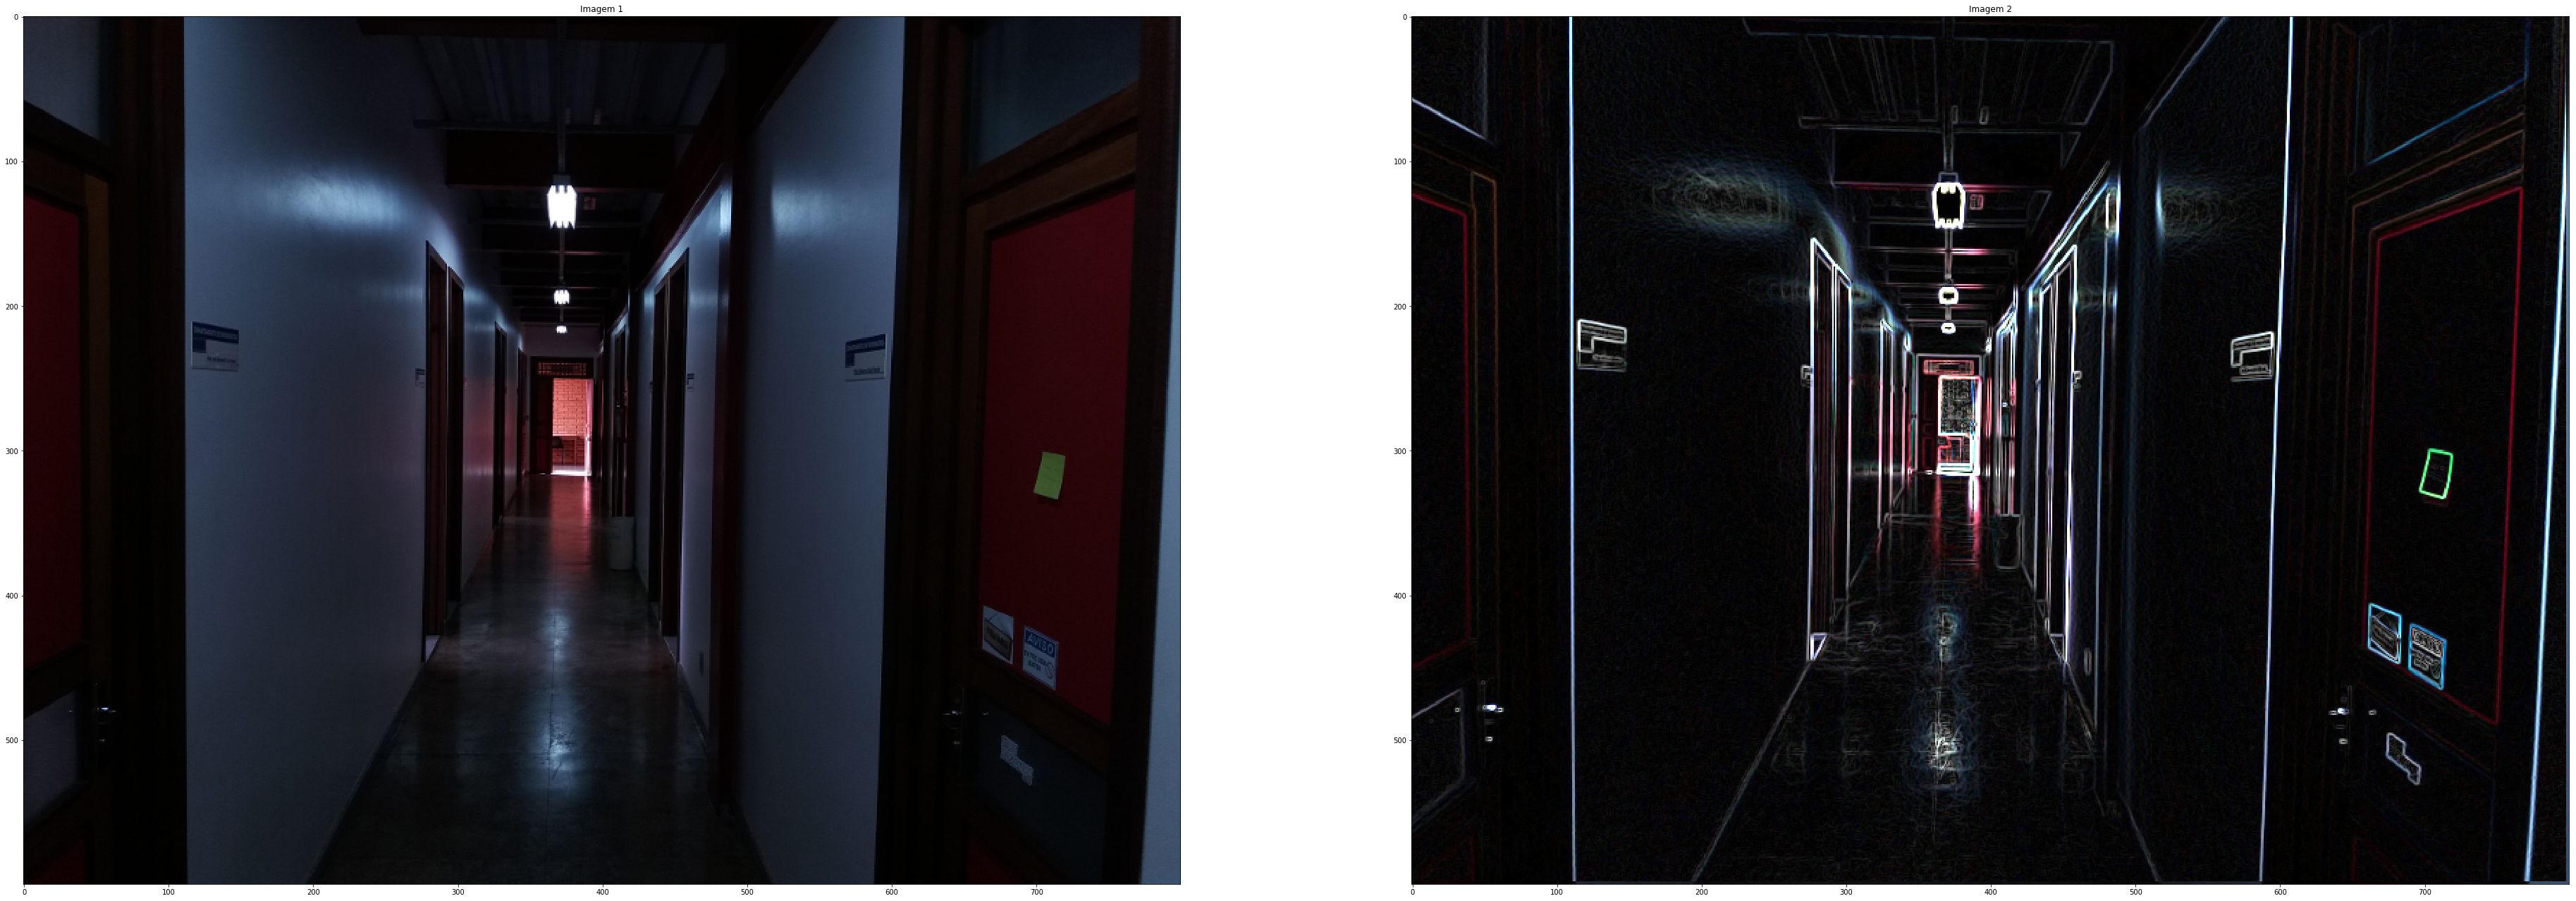

In [16]:
plot(corredor, novoCorredor)

In [17]:
# Gerando imagem tons de cinza
corredorCinza = mudaCor(corredor)
# Aplicando o Sobel
novoCorredorCinza = sobel(corredorCinza)

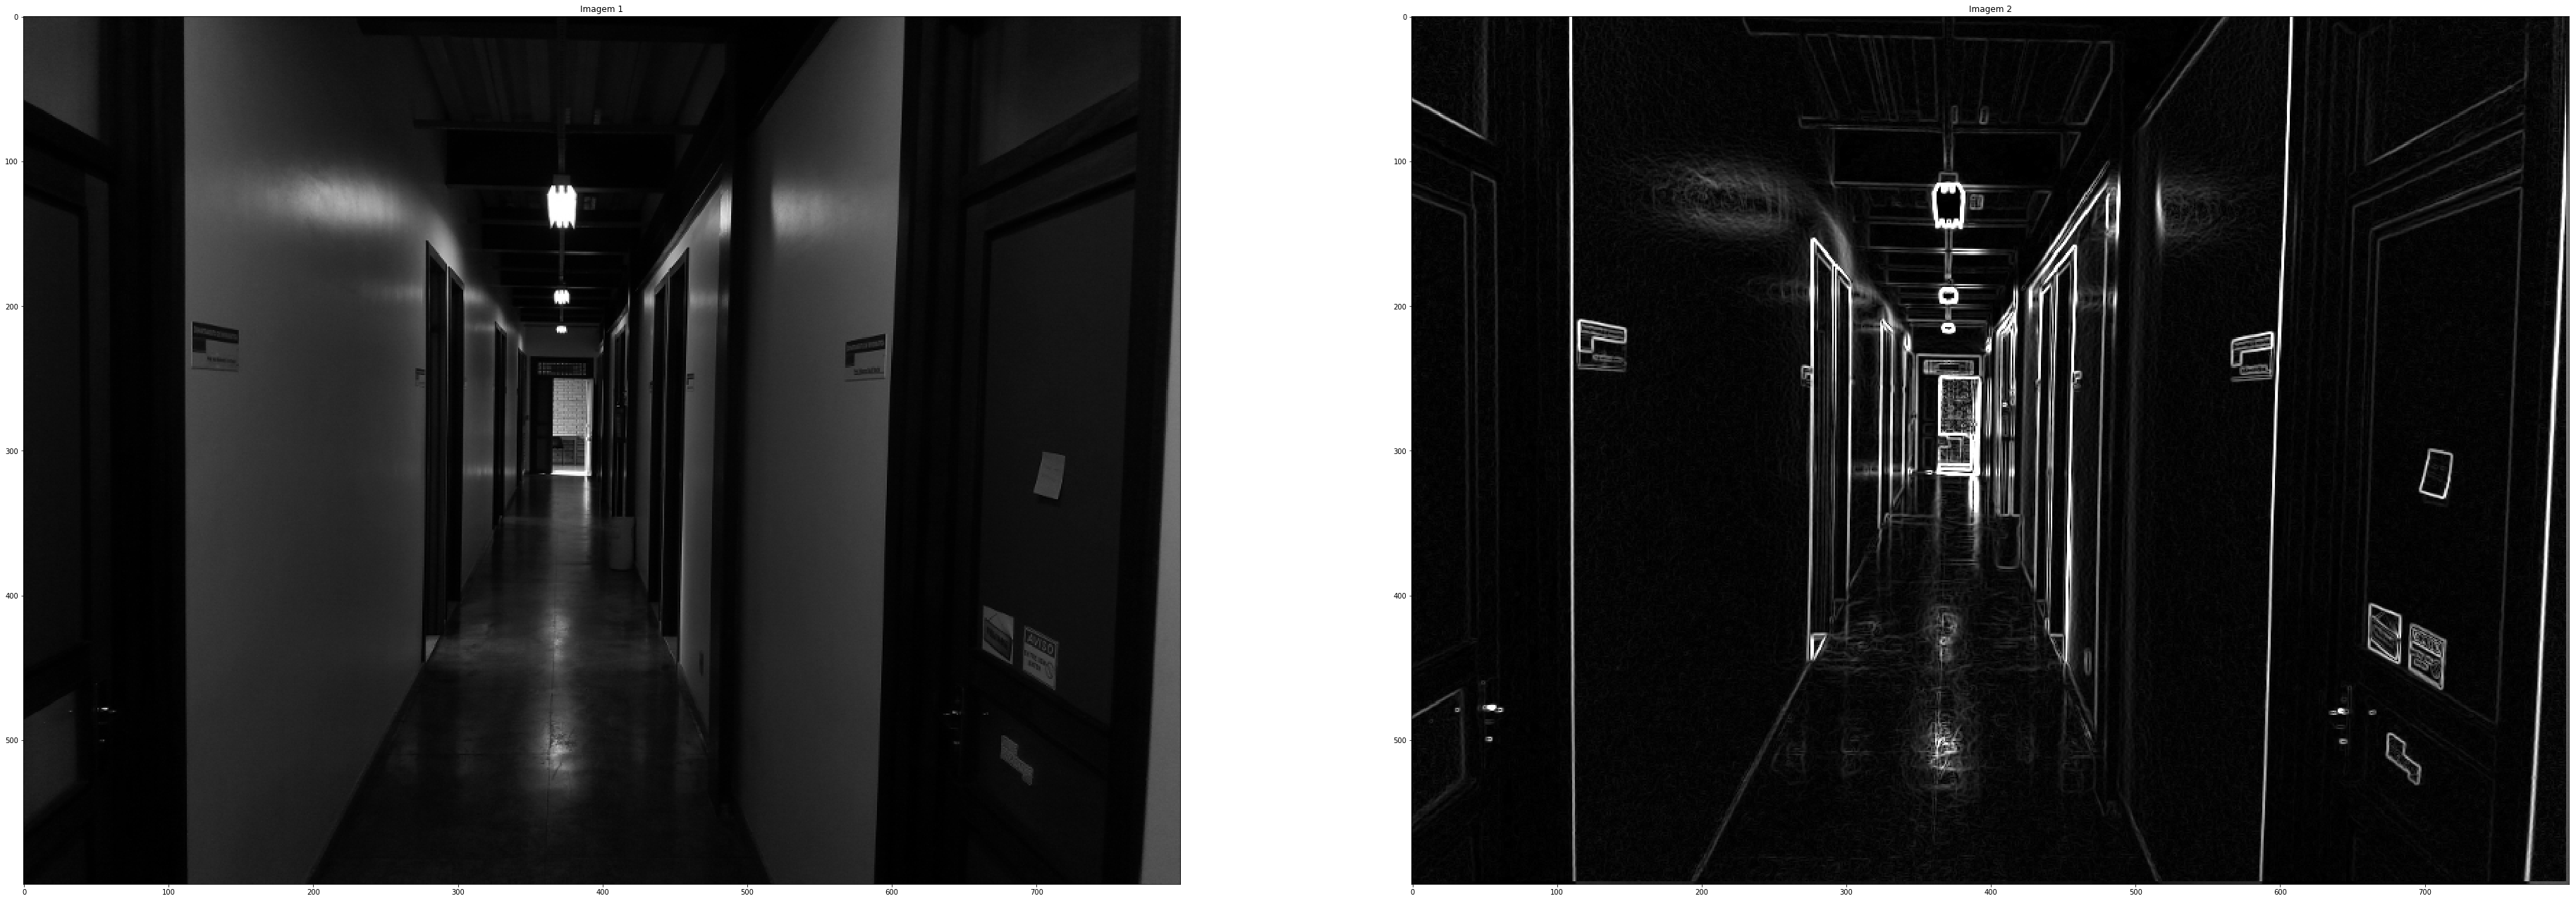

In [18]:
plot(corredorCinza, novoCorredorCinza)

In [19]:
# Aplicando Sobel
novoUFV = sobel(ufv)

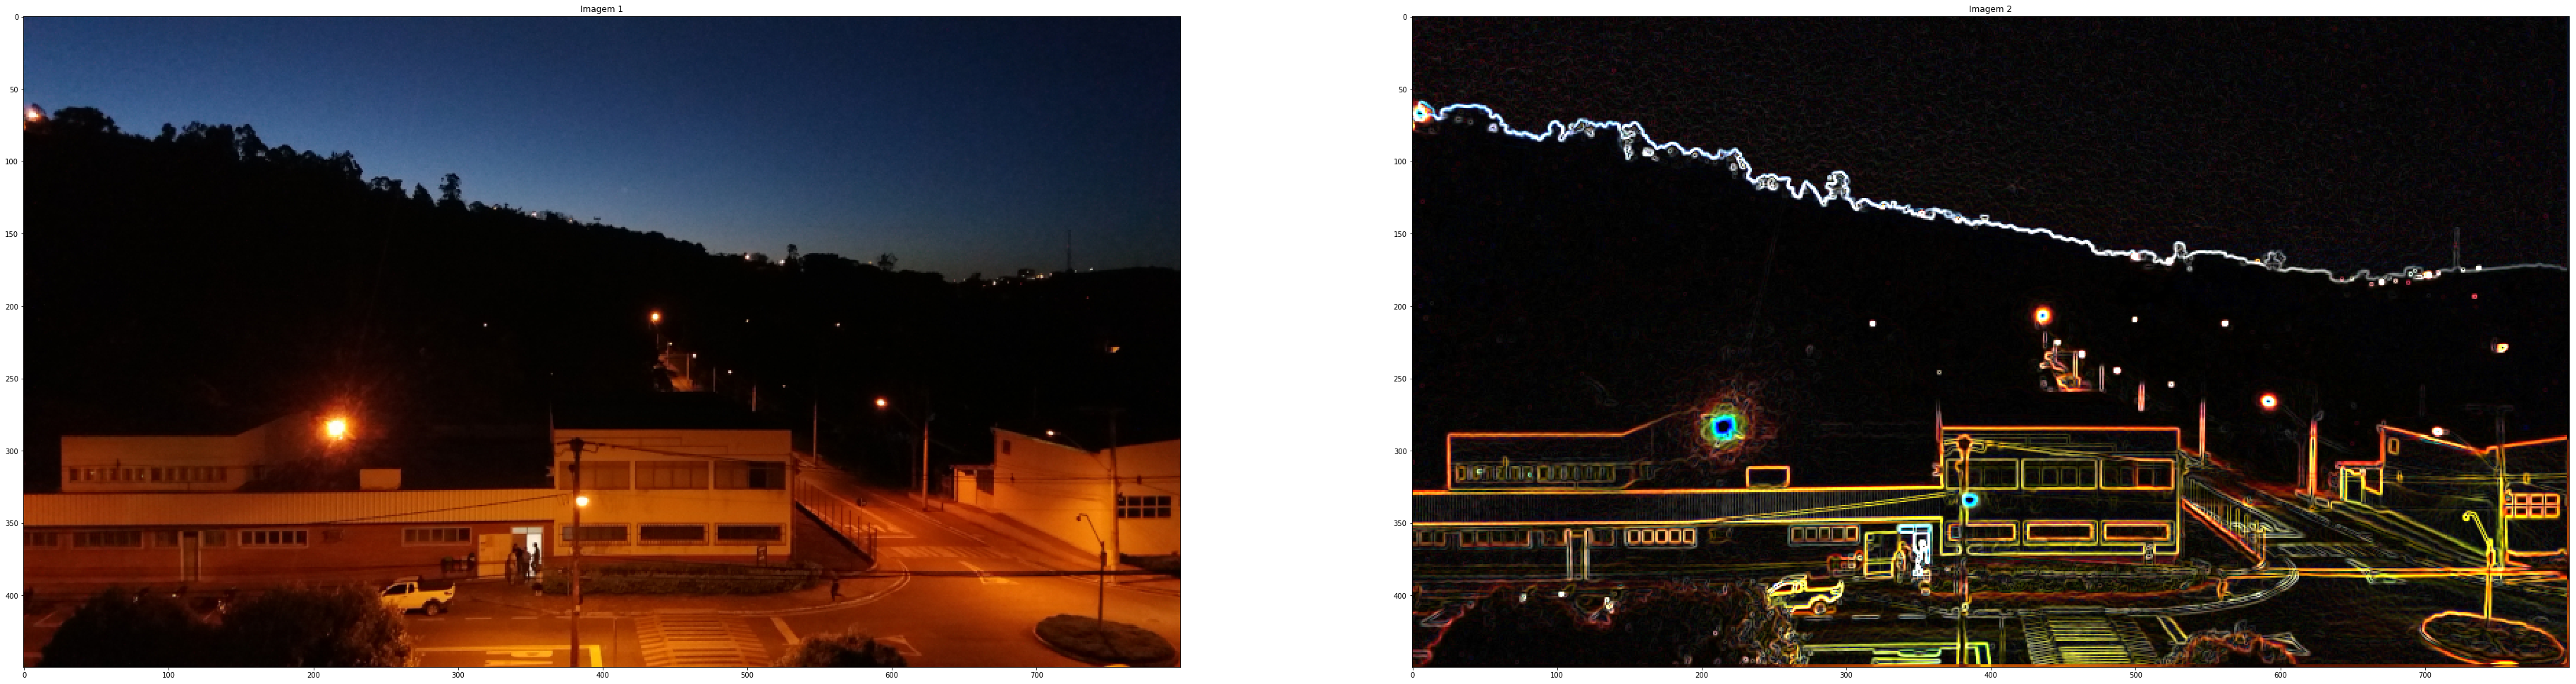

In [20]:
plot(ufv, novoUFV)

In [21]:
# Gerando imagem tons de cinza
ufvCinza = mudaCor(ufv)
# Aplicando Sobel
novoUFVCinza = sobel(ufvCinza)

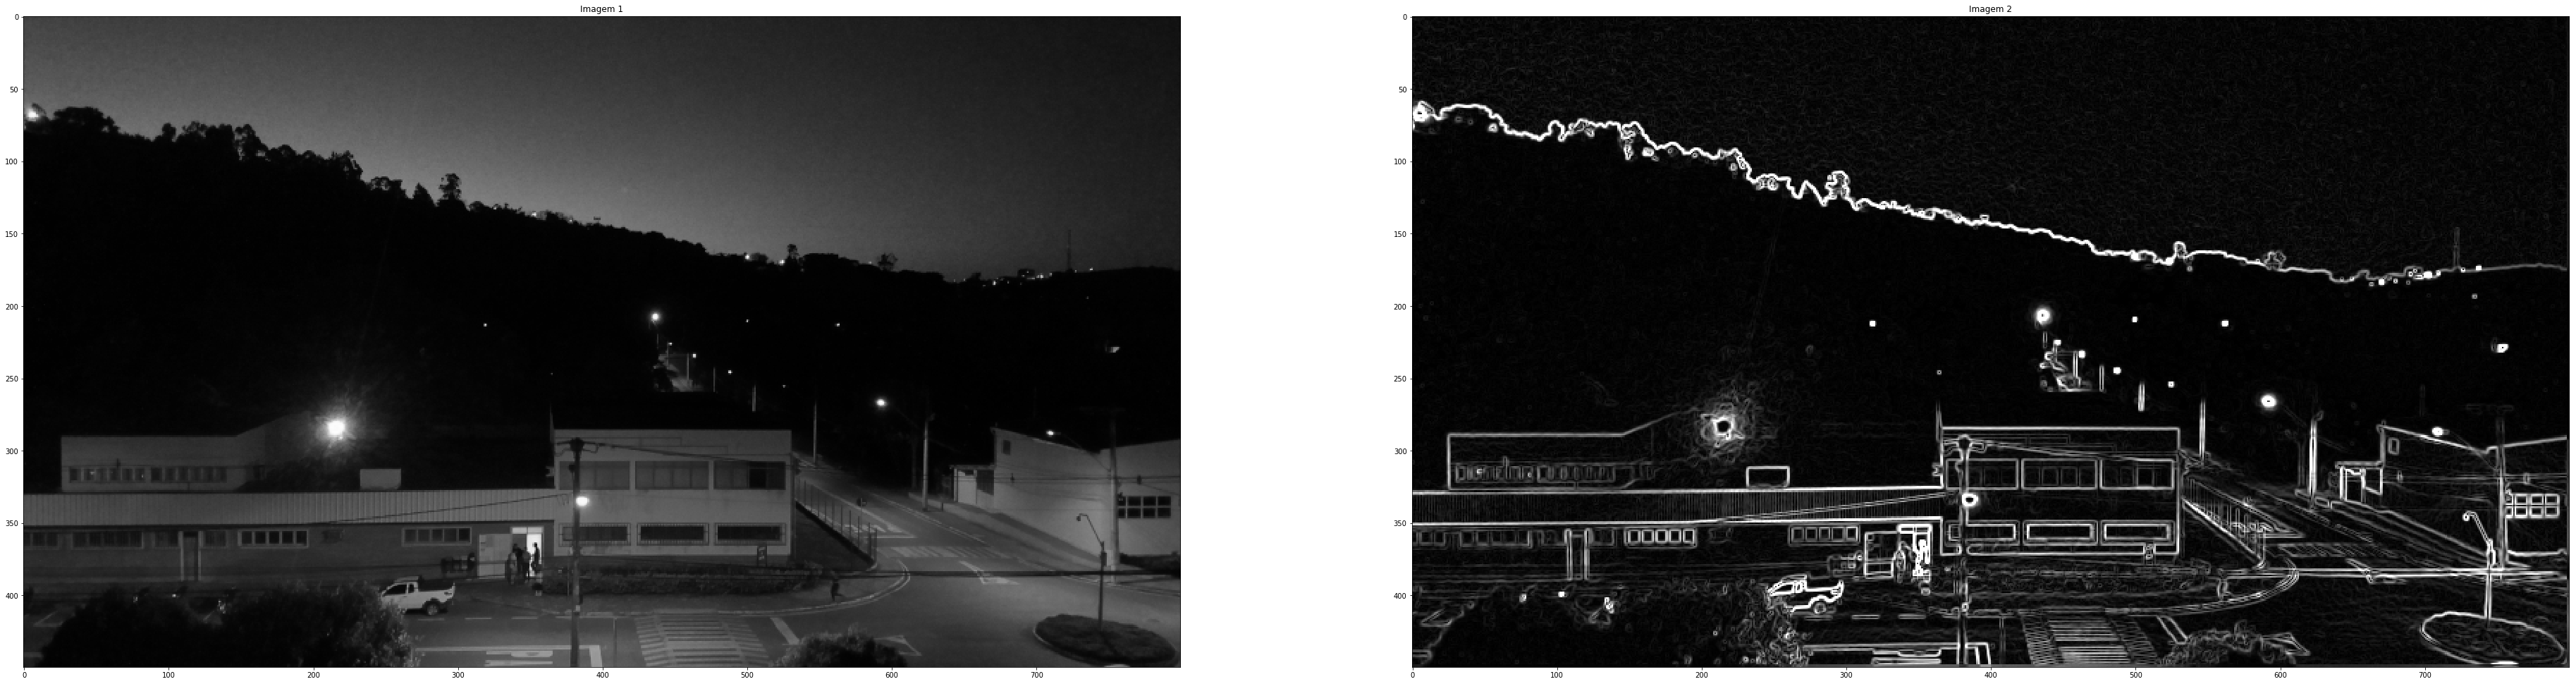

In [22]:
plot(ufvCinza, novoUFVCinza)

## Salvando os arquivos:

In [23]:
novoUFV.save("./resource/img/Tarefa06/ufv_colorido_sobel.jpg")
novoUFVCinza.save("./resource/img/Tarefa06/ufv_cinza_sobel.jpg")
novoCorredor.save("./resource/img/Tarefa06/corredor_colorido_sobel.jpg")
novoCorredorCinza.save("./resource/img/Tarefa06/corredor_cinza_sobel.jpg")